# **Student Performance Indicator**

### Life cycle of the project

* Understanding the Problem Statement
* Data Collection
* Data Checks
* Exploratory Data Analysis
* Data Pre-Processing
* Model Training
* Choosing best model


### 1. Problem Statement

* This project understands how the student's performance (test scores) is affected by other variable such as Gender, Ethnicity, Parent level of education, Lunch and Test preperation

### 2. Data Collection 

* Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
* The data consists of 8 column and 1000 rows.

### 2.1 Importing Data and Packages

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Importing CSV files in pandas dataframe

In [3]:
df = pd.read_csv('data/stud.csv')

#### Top 5 records

In [4]:
df.head()


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Shape of the dataset

In [5]:
df.shape

(1000, 8)

### 2.2 Dataset Information

* gender : sex of students -> (Male/female)
* race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
* parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
* lunch : having lunch before test (standard or free/reduced)
* test preparation course : complete or not complete before test
* math score
* reading score
* writing score

### 3. Data Checks to perform

* Check Missing values
* Check Duplicates
* Check data type
* Check the number of unique values of each column
* Check statistics of data set
* Check various categories present in the different categorical column

#### 3.1 Checking for missing values 

In [6]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

#### 3.2 Checking Duplicates

In [7]:
df.duplicated().sum()

0

#### 3.3 Checking for Data types

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### 3.4 Checking the unique values 

In [9]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

#### 3.5 Checking statistics 

In [10]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Insights

* From the statistics we observe all subjects are closely similarly in mean/average.
* All standard deviations are also close to each other, which can potentially mean similar variabilty and difficulty across all subjects.
* We can see that the subject Math has a min score of 0 unlike the ohter subjects.

#### 3.7 Explorign categories in the data

In [11]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [12]:
print("Categories in 'gender' variable:    ")
print(df['gender'].unique())
print("Categories in 'race_ethnicity' variable:    ")
print(df['race_ethnicity'].unique())
print("Categories in 'parental_level_of_education' variable:    ")
print(df['parental_level_of_education'].unique())
print("Categories in 'lunch' variable:    ")
print(df['lunch'].unique())
print("Categories in 'test_preparation_course' variable:    ")
print(df['test_preparation_course'].unique())



Categories in 'gender' variable:    
['female' 'male']
Categories in 'race_ethnicity' variable:    
['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education' variable:    
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:    
['standard' 'free/reduced']
Categories in 'test_preparation_course' variable:    
['none' 'completed']


In [13]:
numerical_feature = []
categorical_feature = []
for feature in df.columns:
    if df[feature].dtype != 'O':
        numerical_feature.append(feature)
        
    else: 
        categorical_feature.append(feature)
        

print (f'Numerical features :{numerical_feature}')   
print (f'Categorical features :{categorical_feature}')

Numerical features :['math_score', 'reading_score', 'writing_score']
Categorical features :['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [14]:
df.head(1)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74


### 3.8 Adding features (total score & average)

In [15]:
df['total_score'] = df['math_score'] + df['writing_score'] + df['reading_score'] 
df['average'] = df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [16]:
math_full = df[df.math_score == 100]['math_score'].count()
reading_full = df[df.reading_score	 == 100]['reading_score'].count()
writing_full = df[df.writing_score == 100]['writing_score'].count()

print(f'Number of Students with full score in Math: {math_full}')
print(f'Number of Students with full score in reading: {reading_full}')
print(f'Number of Students with full score in writing: {writing_full}')

Number of Students with full score in Math: 7
Number of Students with full score in reading: 17
Number of Students with full score in writing: 14


In [17]:
math_full = df[df.math_score <= 20]['math_score'].count()
reading_full = df[df.reading_score	 <= 20]['reading_score'].count()
writing_full = df[df.writing_score <= 20]['writing_score'].count()

print(f'Number of Students falling short of 20 scores in Math: {math_full}')
print(f'Number of Students falling short of 20 scores in reading: {reading_full}')
print(f'Number of Students falling short of 20 scores in writing: {writing_full}')

Number of Students falling short of 20 scores in Math: 4
Number of Students falling short of 20 scores in reading: 1
Number of Students falling short of 20 scores in writing: 3


Insights

* From above values we get students have performed the worst in Math
* Best performance is in reading section

### 4. Data Visualization

#### 4.1 Histogram & KDE

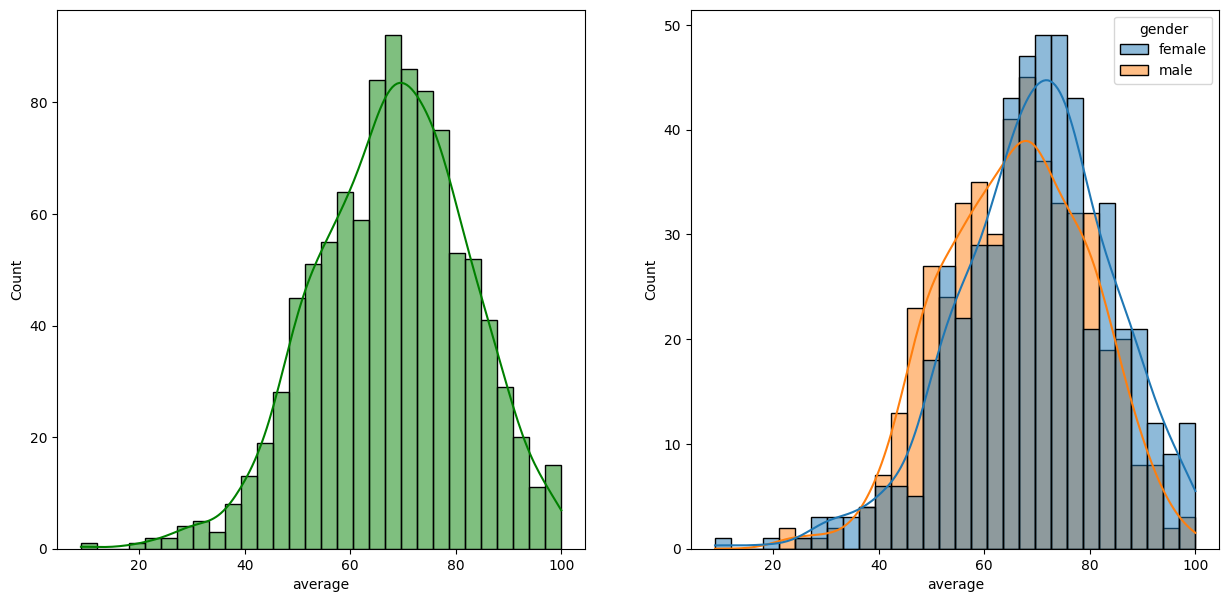

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data = df, x = 'average',bins = 30, kde = True, color = 'g')
plt.subplot(122)
sns.histplot(data = df, x = 'average', bins = 30, kde = True, hue = 'gender')
plt.show()

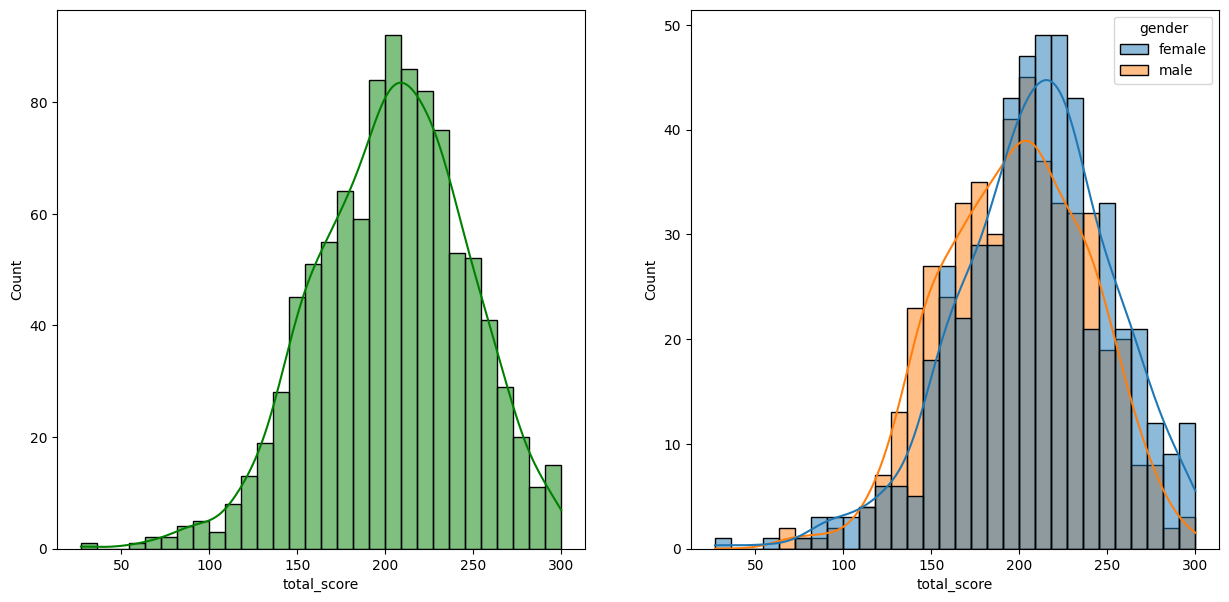

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data = df, x = 'total_score',bins = 30, kde = True, color = 'g')
plt.subplot(122)
sns.histplot(data = df, x = 'total_score', bins = 30, kde = True, hue = 'gender')
plt.show()

Insights

* Female students tend to perform better than male students.

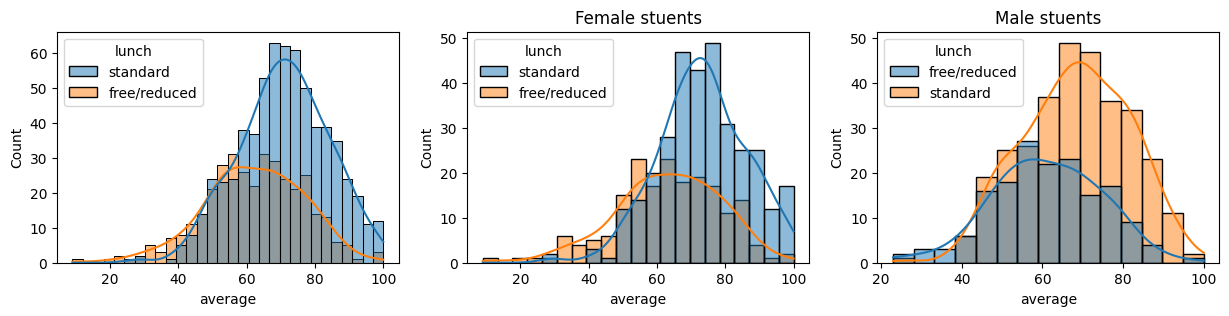

In [20]:
fig, axs = plt.subplots(1, 3, figsize = (15, 3))
plt.subplot(131)
sns.histplot(data = df, x = "average", bins = 30, kde = True, hue = 'lunch')
plt.subplot(132)
plt.title('Female stuents')
sns.histplot(data = df[df.gender == 'female'], x = "average", kde = True, hue = 'lunch')
plt.subplot(133)
plt.title('Male stuents')
sns.histplot(data = df[df.gender == 'male'], x = "average", kde = True, hue = 'lunch')

plt.show()

Insights

* Standard lunch is consistent in helping perform well in exams for both male and female.

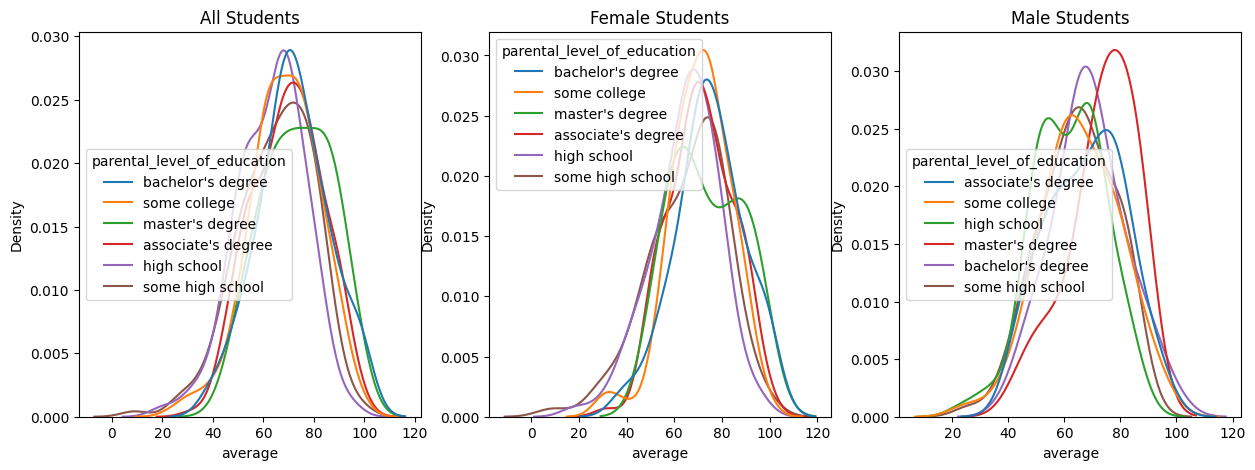

In [21]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Overall KDE plot
plt.subplot(131)
sns.kdeplot(data=df, x="average", hue='parental_level_of_education', common_norm=False)
plt.title('All Students')

# Female students
plt.subplot(132)
sns.kdeplot(data=df[df.gender == 'female'], x="average", hue='parental_level_of_education', common_norm=False)
plt.title('Female Students')

# Male students
plt.subplot(133)
sns.kdeplot(data=df[df.gender == 'male'], x="average", hue='parental_level_of_education', common_norm=False)
plt.title('Male Students')

plt.show()


Insights

* There is no consistent or direct proof from the graph that parental level of education strongly determines student scores. Students across all parental education levels can achieve a wide range of scores.

* While students with parents holding a master's degree show a broader range of scores (indicating more variability), this does not necessarily mean they score lower on average. Their performance is spread over a wider range, including both high and low scores.

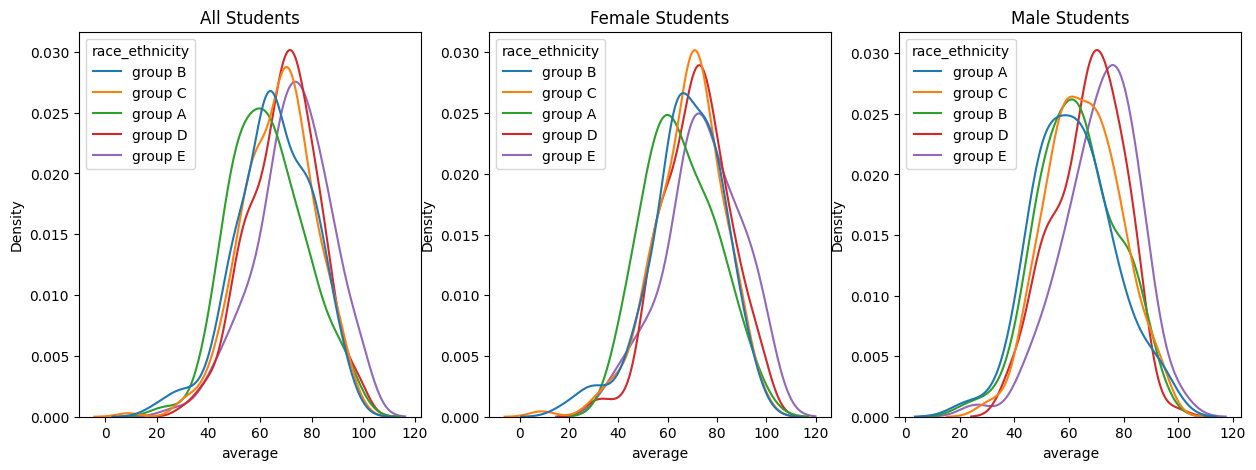

In [22]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Overall KDE plot
plt.subplot(131)
sns.kdeplot(data=df, x="average", hue='race_ethnicity', common_norm=False)
plt.title('All Students')

# Female students
plt.subplot(132)
sns.kdeplot(data=df[df.gender == 'female'], x="average", hue='race_ethnicity', common_norm=False)
plt.title('Female Students')

# Male students
plt.subplot(133)
sns.kdeplot(data=df[df.gender == 'male'], x="average", hue='race_ethnicity', common_norm=False)
plt.title('Male Students')

plt.show()


Insights


* Male students show greater variability in performance by racial/ethnic group, with clearer separations between groups.
* Female students' performance is more uniform across racial/ethnic groups, with distributions showing more overlap.


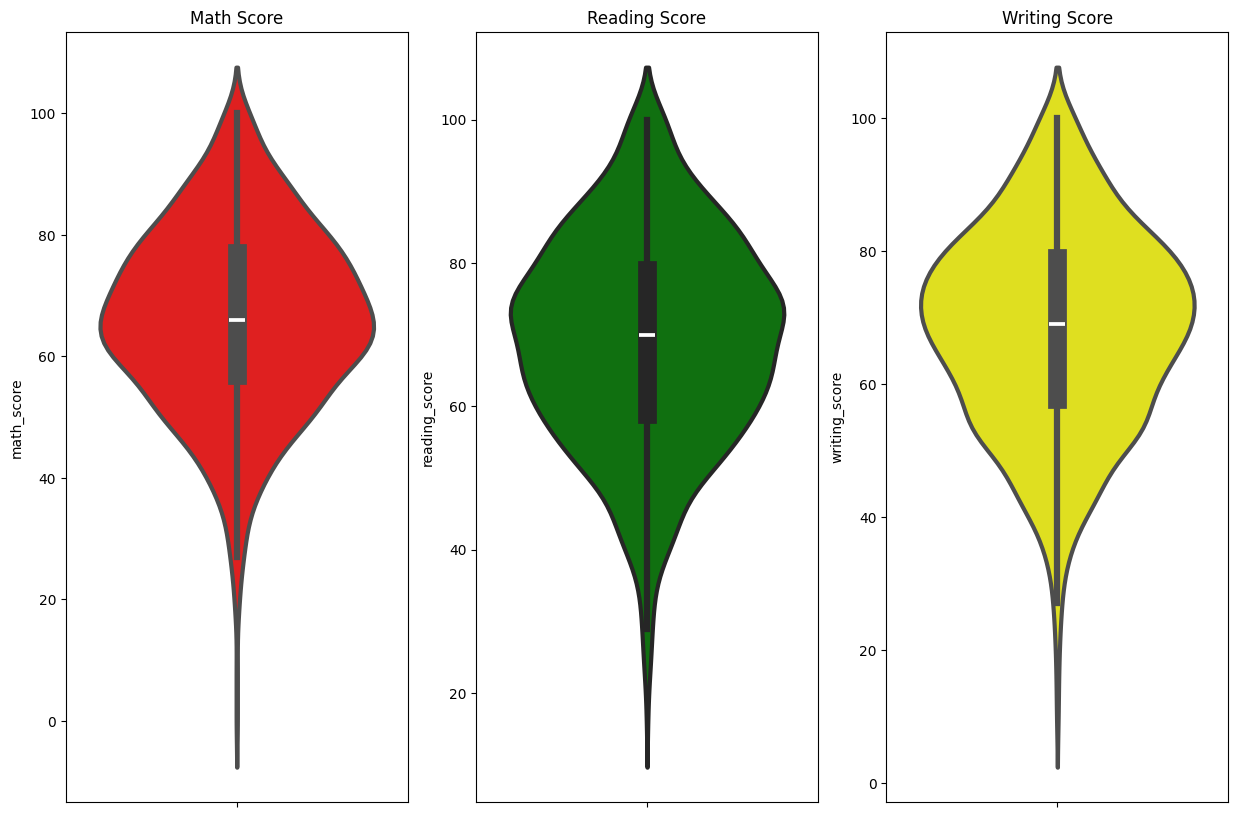

In [23]:
fig, axs = plt.subplots(1, 3, figsize=(15, 10))

# Overall KDE plot
plt.subplot(131)
sns.violinplot(data=df,y = 'math_score', linewidth = 3, color = 'red' )
plt.title('Math Score')

# Female students
plt.subplot(132)
sns.violinplot(data=df,y = 'reading_score', linewidth = 3, color = 'green' )
plt.title('Reading Score')

# Male students
plt.subplot(133)
sns.violinplot(data=df,y = 'writing_score', linewidth = 3, color = 'yellow' )
plt.title('Writing Score')

plt.show()


Insights

* From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

In [24]:
df.head(1)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667


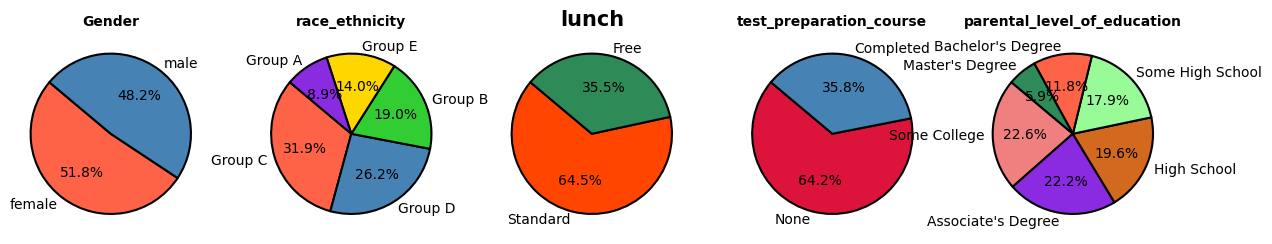

In [25]:
fig, axs = plt.subplots(1, 5, figsize = (15,5))
plt.subplot(151)
size = df.gender.value_counts()
color = ['#FF6347', '#4682B4']
labels = "female", "male"
plt.pie(size, colors=color, labels=labels, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black', 'linewidth': 1.5, 'linestyle': 'solid'})
plt.title('Gender', fontsize=10, fontweight='bold')
plt.axis('off')

plt.subplot(152)
size = df['race_ethnicity'].value_counts()
color = ['#FF6347', '#4682B4', '#32CD32', '#FFD700', '#8A2BE2']
labels = 'Group C', 'Group D', 'Group B', 'Group E', 'Group A'
plt.pie(size, colors=color, labels=labels, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black', 'linewidth': 1.5, 'linestyle': 'solid'})
plt.title('race_ethnicity', fontsize=10, fontweight='bold')
plt.axis('off')

plt.subplot(153)
size = df['lunch'].value_counts()
color = ['#FF4500', '#2E8B57']
labels ='Standard', 'Free'
plt.pie(size, colors=color, labels=labels, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black', 'linewidth': 1.5, 'linestyle': 'solid'})
plt.title('lunch', fontsize=15, fontweight='bold')
plt.axis('off')

plt.subplot(154)
size = df['test_preparation_course'].value_counts()
color = ['#DC143C', '#4682B4']
labels ='None', 'Completed'
plt.pie(size, colors=color, labels=labels, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black', 'linewidth': 1.5, 'linestyle': 'solid'})
plt.title('test_preparation_course', fontsize=10, fontweight='bold')
plt.axis('off')

plt.subplot(155)
size = df['parental_level_of_education'].value_counts()
color = ['#F08080', '#8A2BE2', '#D2691E', '#98FB98', '#FF6347', '#2E8B57']
labels ='Some College', "Associate's Degree", 'High School', 'Some High School', "Bachelor's Degree", "Master's Degree"
plt.pie(size, colors=color, labels=labels, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black', 'linewidth': 1.5, 'linestyle': 'solid'})
plt.title('parental_level_of_education', fontsize=10, fontweight='bold')
plt.axis('off')
plt.show()


Insights

* Number of Male and Female students is almost equal
* Number students are greatest in Group C
* Number of students who have standard lunch are greater
* Number of students who have not enrolled in any test preparation course is greater
* Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

#### BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? )

In [26]:
gender_group = df.groupby('gender')[['math_score', 'reading_score', 'writing_score']].mean()
gender_group

,math_score,reading_score,writing_score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


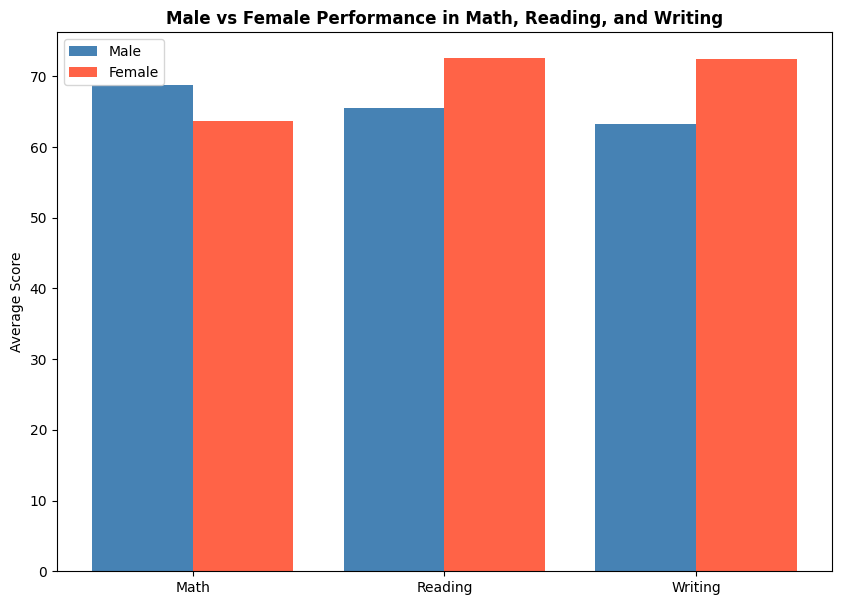

In [27]:
subjects = ['Math', 'Reading', 'Writing']

male_scores = [gender_group.loc['male','math_score'], gender_group.loc['male','reading_score'], gender_group.loc['male','writing_score']]
female_scores = [gender_group.loc['female','math_score'], gender_group.loc['female','reading_score'], gender_group.loc['female','writing_score']]

X_axis = np.arange(len(subjects))

plt.figure(figsize = (10,7))
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male', color='#4682B4')
plt.bar(X_axis + 0.2, female_scores, 0.4, label='Female', color='#FF6347')
plt.xticks(X_axis, subjects)
# Add labels and title
plt.ylabel("Average Score")
plt.title("Male vs Female Performance in Math, Reading, and Writing", fontweight='bold')
# Add legend
plt.legend()


plt.show()



Insights

* Female stuents tend to peform better.
* When it comes to Math male students tend to score bettr. 

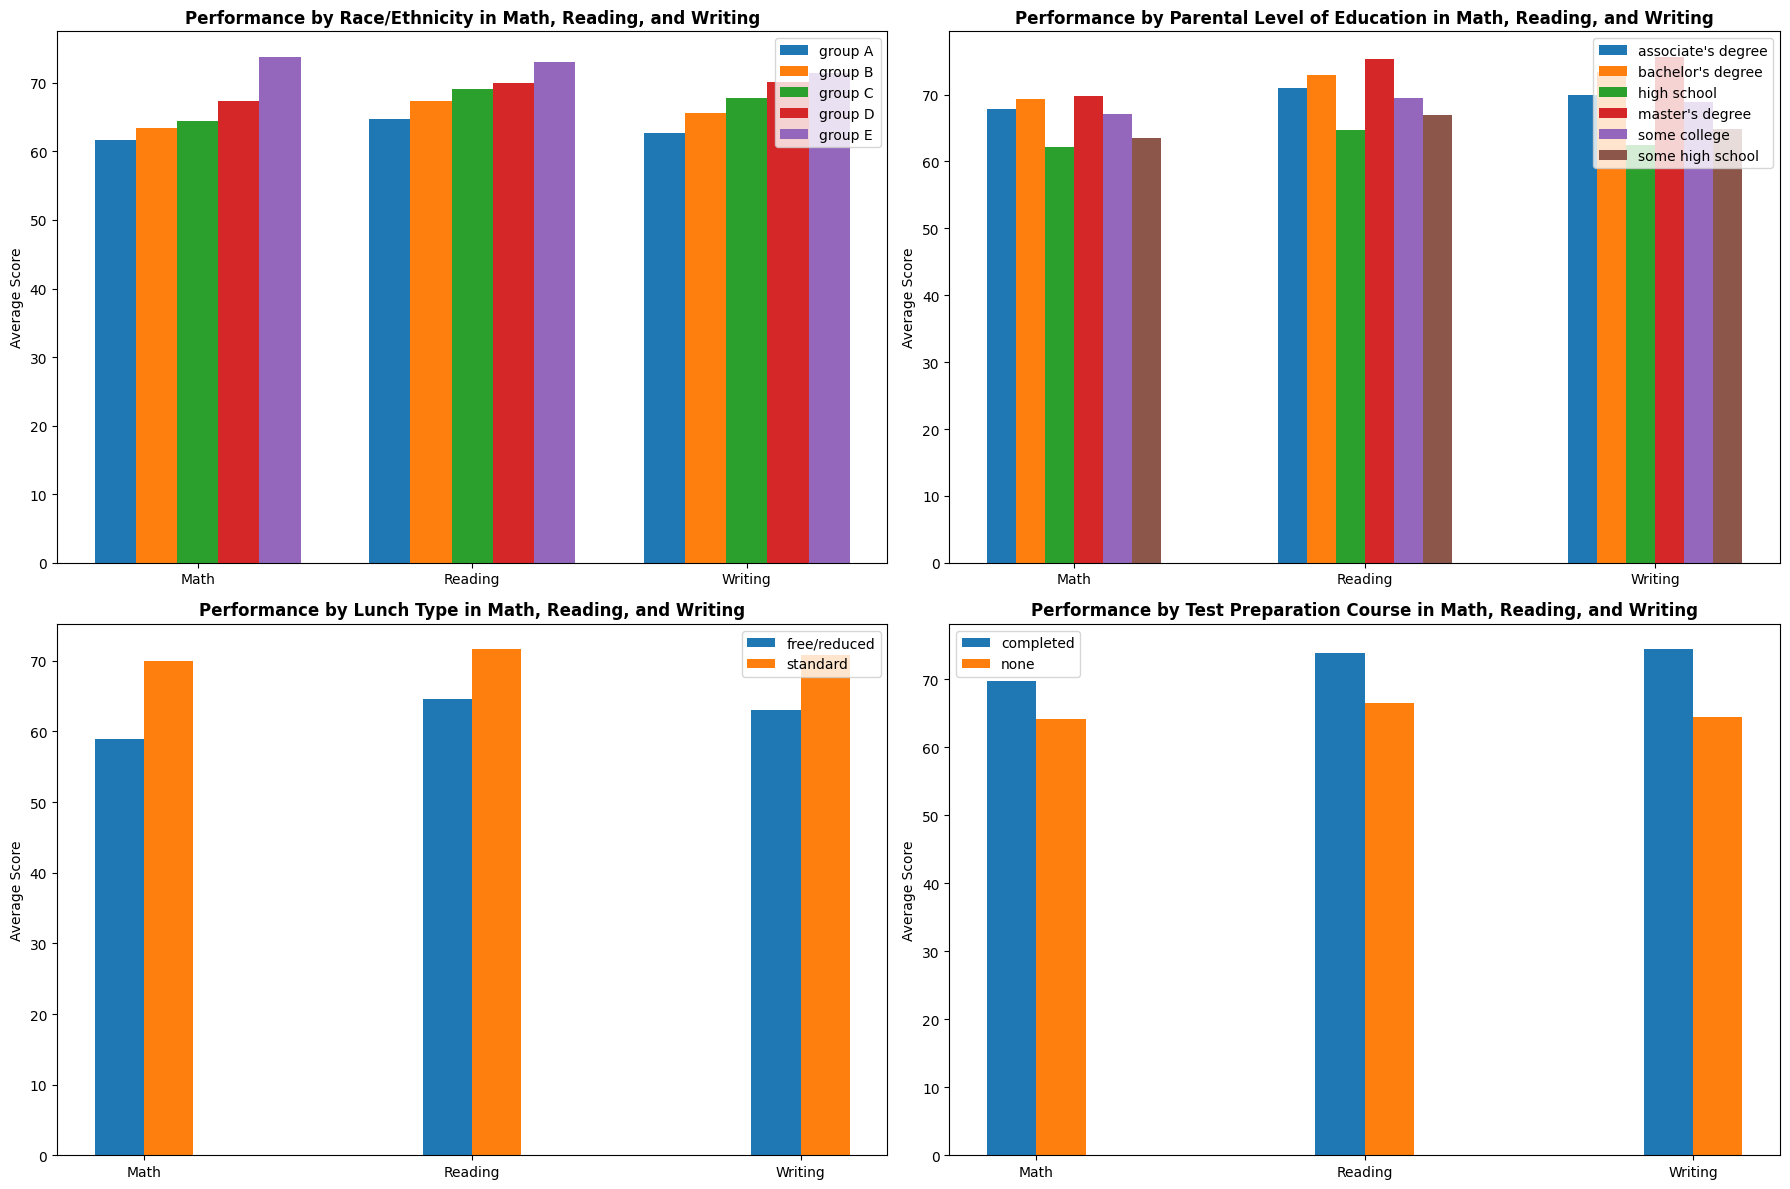

In [28]:
# Group by the respective categorical variables and calculate the mean for each subject
race_group = df.groupby('race_ethnicity')[['math_score', 'reading_score', 'writing_score']].mean()
parental_education_group = df.groupby('parental_level_of_education')[['math_score', 'reading_score', 'writing_score']].mean()
lunch_group = df.groupby('lunch')[['math_score', 'reading_score', 'writing_score']].mean()
test_preparation_group = df.groupby('test_preparation_course')[['math_score', 'reading_score', 'writing_score']].mean()

# X-axis labels (subjects)
subjects = ['Math', 'Reading', 'Writing']
X_axis = np.arange(len(subjects))  # Position of the bars

# Set the figure size
plt.figure(figsize=(18, 12))

### Race/Ethnicity ###
plt.subplot(2, 2, 1)  # 2 rows, 2 columns, 1st subplot
for group in race_group.index:
    plt.bar(X_axis + 0.15*(list(race_group.index).index(group) - 2), race_group.loc[group], 0.15, label=group)
plt.xticks(X_axis, subjects)
plt.ylabel("Average Score")
plt.title("Performance by Race/Ethnicity in Math, Reading, and Writing", fontweight='bold')
plt.legend()

### Parental Level of Education ###
plt.subplot(2, 2, 2)  # 2nd subplot
for group in parental_education_group.index:
    plt.bar(X_axis + 0.1*(list(parental_education_group.index).index(group) - 2.5), parental_education_group.loc[group], 0.1, label=group)
plt.xticks(X_axis, subjects)
plt.ylabel("Average Score")
plt.title("Performance by Parental Level of Education in Math, Reading, and Writing", fontweight='bold')
plt.legend()

### Lunch ###
plt.subplot(2, 2, 3)  # 3rd subplot
for group in lunch_group.index:
    plt.bar(X_axis + 0.15*(list(lunch_group.index).index(group) - 0.5), lunch_group.loc[group], 0.15, label=group)
plt.xticks(X_axis, subjects)
plt.ylabel("Average Score")
plt.title("Performance by Lunch Type in Math, Reading, and Writing", fontweight='bold')
plt.legend()

### Test Preparation Course ###
plt.subplot(2, 2, 4)  # 4th subplot
for group in test_preparation_group.index:
    plt.bar(X_axis + 0.15*(list(test_preparation_group.index).index(group) - 0.5), test_preparation_group.loc[group], 0.15, label=group)
plt.xticks(X_axis, subjects)
plt.ylabel("Average Score")
plt.title("Performance by Test Preparation Course in Math, Reading, and Writing", fontweight='bold')
plt.legend()

# Display the plots
plt.tight_layout()
plt.show()




Insights

* Group E students have scored the hgihest marks.
* Group A students have scored the lowest marks
* Students from a lower Socioeconomic status have a lower avg in all course subjects.
* The score of student whose parents possess master and bachelor level education are higher than others.

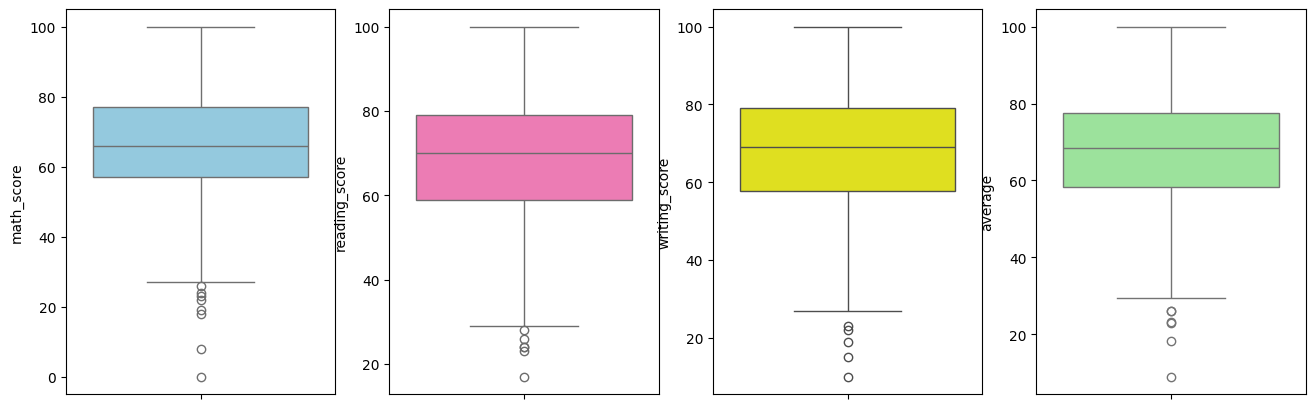

In [29]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

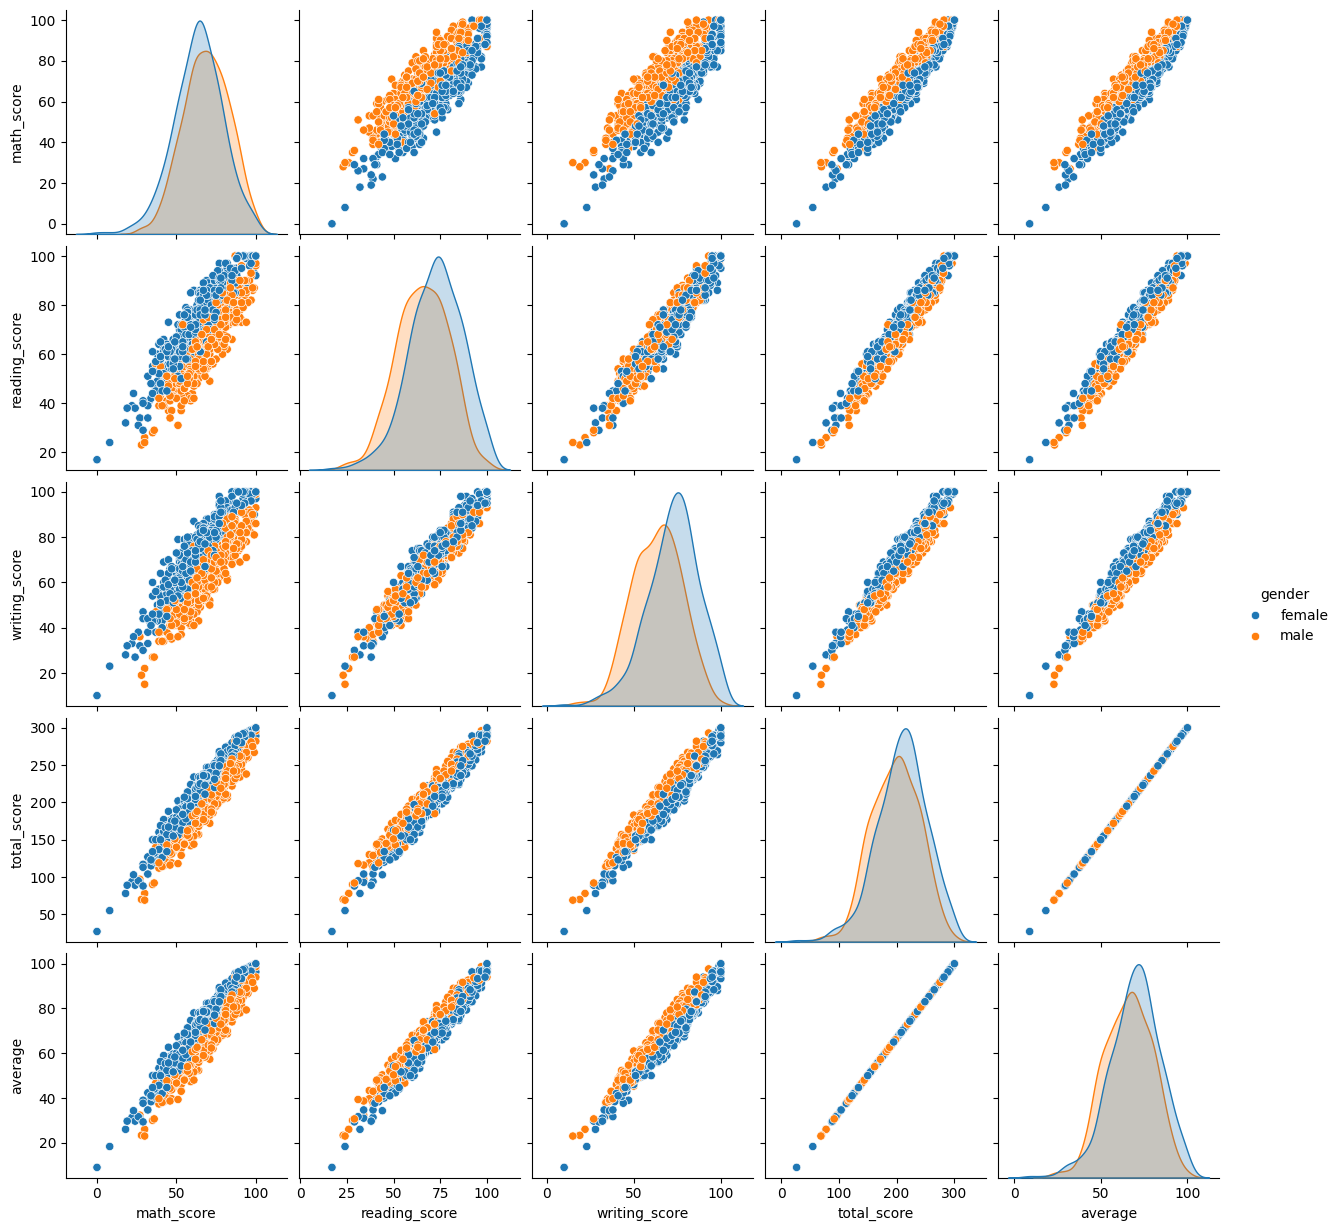

In [30]:
sns.pairplot(df,hue = 'gender')
plt.show()

Insights

* From the pairplot we see that all scores increase linearly with each other.